# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

# Customers Sales Insights

## Customer Order Frequency

In [16]:
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.columns = ['Customer ID', 'Customer Name', 'Segment', 'Order Frequency']
customer_order_frequency = customer_order_frequency.sort_values(by='Order Frequency', ascending=False).reset_index(drop=True)
print(customer_order_frequency)

    Customer ID      Customer Name      Segment  Order Frequency
0      WB-21850      William Brown     Consumer               37
1      MA-17560       Matt Abelman  Home Office               34
2      JL-15835           John Lee     Consumer               34
3      PP-18955         Paul Prost  Home Office               34
4      EH-13765       Edward Hooks    Corporate               32
..          ...                ...          ...              ...
788    AO-10810  Anthony O'Donnell    Corporate                1
789    LD-16855       Lela Donovan    Corporate                1
790    RE-19405    Ricardo Emerson     Consumer                1
791    CJ-11875       Carl Jackson    Corporate                1
792    JR-15700     Jocasta Rupert     Consumer                1

[793 rows x 4 columns]


## Visualizing Customer Order Frequency

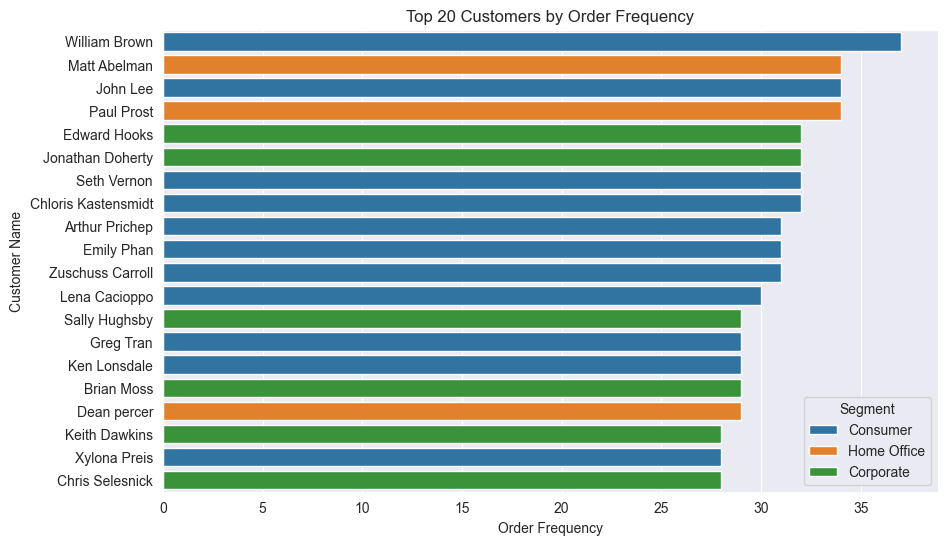

In [18]:
top_customers = customer_order_frequency.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Order Frequency', y='Customer Name', hue='Segment', dodge=False)
plt.title('Top 20 Customers by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Customer Name')
plt.legend(title='Segment')
plt.show()

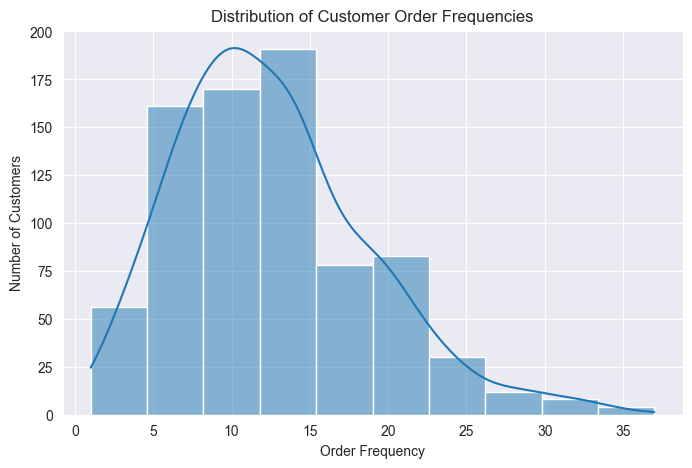

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_order_frequency['Order Frequency'], bins=10, kde=True)
plt.title('Distribution of Customer Order Frequencies')
plt.xlabel('Order Frequency')
plt.ylabel('Number of Customers')
plt.show()

## Customer Total Sales

In [17]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
customer_sales.columns = ['Customer ID', 'Customer Name', 'Segment', 'Total Sales']
customer_sales = customer_sales.sort_values(by='Total Sales', ascending=False).reset_index(drop=True)
print(customer_sales)

    Customer ID    Customer Name      Segment  Total Sales
0      SM-20320      Sean Miller  Home Office    25043.050
1      TC-20980     Tamara Chand    Corporate    19052.218
2      RB-19360     Raymond Buch     Consumer    15117.339
3      TA-21385     Tom Ashbrook  Home Office    14595.620
4      AB-10105    Adrian Barton     Consumer    14473.571
..          ...              ...          ...          ...
788    RS-19870       Roy Skaria  Home Office       22.328
789    MG-18205  Mitch Gastineau    Corporate       16.739
790    CJ-11875     Carl Jackson    Corporate       16.520
791    LD-16855     Lela Donovan    Corporate        5.304
792    TS-21085    Thais Sissman     Consumer        4.833

[793 rows x 4 columns]


## Visualizing Customer Total Sales

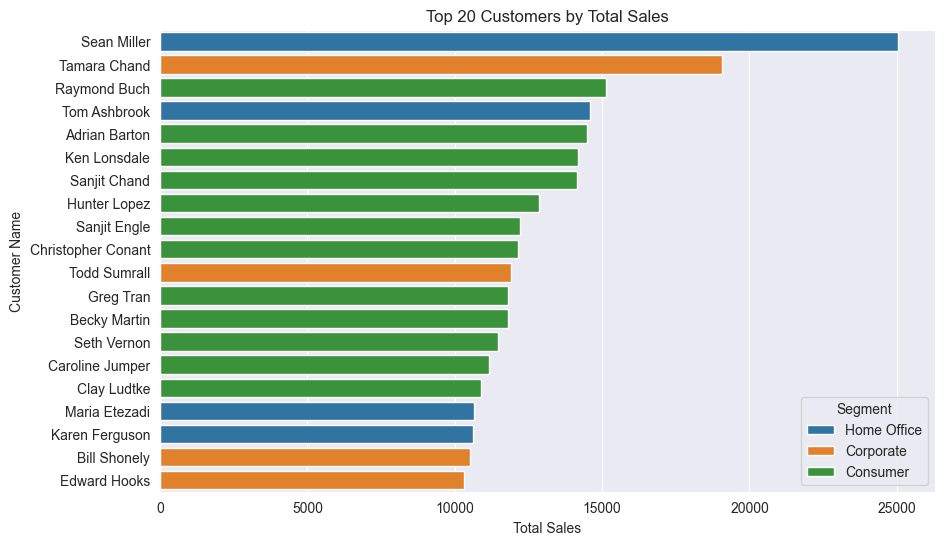

In [22]:
top_customers_sales = customer_sales.head(20)  # Top 20 customers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers_sales, x='Total Sales', y='Customer Name', hue='Segment', dodge=False)
plt.title('Top 20 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.legend(title='Segment')
plt.show()

---